<font size=+2 color="Black"><center><b>Effectiveness of Telehealth in Saudi Arabia During COVID-19 Pandemic</b></center></font>


# **About this notebook**



![](https://media1.tenor.com/images/ed7cffc243c6a6ffe63058e79d1ea0ac/tenor.gif?itemid=16735375)


In this notebook we discuss the current status of the use of remote health services applications    during the emerging Corona pandemic in Saudi Arabia , in addition to the effectiveness of these applications in supporting public health measures, and to know the opinions of users of applications such as the Tawakkalna application.


# Let's get started...
![](https://miro.medium.com/proxy/1*_JW1JaMpK_fVGld8pd1_JQ.gif)



# Loading libraries

In [1]:
#Loading libraries

import numpy as np
import pandas as pd
import seaborn as sns
import re
from collections import defaultdict,Counter
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import string
import textstat
from textblob import TextBlob 
from tqdm import tqdm
from statistics import *
from bidi.algorithm import get_display
from pprint import pprint
import warnings
warnings.filterwarnings('ignore')
#you have to download this packeg if you want arabic text 
import arabic_reshaper

# for scientific computing and technical computing
from scipy import linalg
from scipy.stats import norm
from scipy import stats

#for displaying 500 results in pandas dataframe
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

#from keras.preprocessing.text import Tokenizer
#from keras.preprocessing.sequence import pad_sequences
#from keras.models import Sequential
#from keras.layers import Embedding,LSTM,Dense,SpatialDropout1D
#from keras.initializers import Constant
#from keras.optimizers import Adam
#from tqdm import tqdm

import nltk
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.util import ngrams
from nltk.corpus import stopwords

#from nltk.tokenize.moses import MosesDetokenizer

###### Farasa is an Arabic NLP toolkit serving the following tasks:
1.	Segmentation.
2.	Stemming.
3.	Named Entity Recognition (NER).
4.	Part Of Speech tagging (POS tagging).
5.	Diacritization.


In [2]:
from farasa.pos import FarasaPOSTagger 
from farasa.ner import FarasaNamedEntityRecognizer 
from farasa.diacratizer import FarasaDiacritizer 
from farasa.segmenter import FarasaSegmenter 
from farasa.stemmer import FarasaStemmer

In [3]:
# Sklearn
from sklearn import decomposition
from sklearn import datasets
from sklearn.decomposition import LatentDirichletAllocation, TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_20newsgroups
from sklearn.preprocessing import StandardScaler

# Plotting tools
import pyLDAvis
import pyLDAvis.sklearn
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
plt.style.use('ggplot')
from plotly import tools
import plotly.offline as py
import plotly.figure_factory as ff
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
plt.style.use('seaborn')
from PIL import Image

In [4]:
# gensim
import gensim
from gensim import corpora, models, similarities, matutils
# logging for gensim (set to INFO)
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

# Read Data

In [5]:
df=pd.read_excel("data_covid2.xlsx")

df.head()

,طابع زمني,العمر,الحالة الاجتماعية,الجنس,المستوى التعليمي,هل سمعت من قبل عن الرعاية الصحية عن بعد؟,هل استخدمت أي خدمات للرعاية الصحية عن بعد من قبل؟,لقد استخدمت الخدمات الصحية عن بُعد فقط أثناء جائحة كورونا,لقد استخدمت الخدمات الصحية عن بُعد قبل ظهور فيروس كورونا,معرفتي باستخدام الأجهزة الإلكترونية جيدة:,أي من التطبيقات التالية قمت باستخدامه؟(حدد كل ما ينطبق):,أراء المستخدمين,ماهي طريقه التواصل التي استخدمتها لاستقبال الرعاية عبر الخدمات الصحية عن بُعد (حدد كل ما ينطبق):,كم عدد الزيارات التي حصلت عليها من قبل للرعاية الصحية عن بعد؟,كم من الوقت استغرق لقاءك مع الرعاية الصحية عن بعد (بما في ذلك وقت الإعداد والانتظار)؟,[الرعاية الصحية عن بعد فعالة في توصيل أسئلتي ومخاوفي],[التطبيق بسيط وسهل الفهم],[هذا النظام قادر على فعل كل ما أريده أن يكون قادرًا على القيام به.],[تعمل الخدمات الصحية عن بُعد على تحسين وصولي إلى خدمات الرعاية الصحية],[توفر لي الرعاية الصحية عن بُعد الوقت الذي أقضيه في السفر إلى مستشفى أو عيادة متخصصة.],[يمكنني التحدث إلى الطبيب بسهولة باستخدام تطبيق الخدمات الصحية عن بُعد],[تم أخذ التاريخ الطبي المفصل والموافقة قبل علاجي],[أنا راضٍ عن العلاج المقدم من خلال الرعاية الصحية عن بُعد],[أود أن أوصي بهذه الخدمة لعائلتي وأصدقائي],[كان ترتيب زيارة الرعاية الصحية عن بعد سهلاً],أنا راضٍ عن الرعاية التي تلقيتها من خلال استخدام تكنولوجيا الرعاية الصحية عن بُعد,[في غياب جائحة كورونا، أفضل أن أقوم بزيارات مستقبلية باستخدام الخدمات الصحية عن بُعد],[في غياب جائحة كورونا، أفضل إجراء زيارات مستقبلية شخصية بدلاً من الرعاية الصحية عن بعد]
0,2021-10-06 20:47:11.224,١٨-٢٥,أعزب\عزباء,أنثى,جامعي,نعم,نعم,لا,نعم,نعم,"موعد, صحتي, توكلنا",توكلنا تطبيق رائع على مستوى العالم أثبت انه ا...,الدردشة / الرسائل النصية,١-٣,١٠-٢٠ دقيقة,موافق,موافق,موافق,موافق,موافق,موافق,موافق,موافق,موافق,موافق,موافق,موافق,موافق
1,2021-10-07 04:14:31.799,١٨-٢٥,أعزب\عزباء,أنثى,جامعي,نعم,لا,نعم,نعم,لا,"موعد, صحتي, توكلنا",متوقف عندي بعض التطبيقات على سبيل المثال الجو...,"المكالمات الصوتية/الهاتفية, الدردشة/الرسائل ال...",0,١٠-٢٠ دقيقة,موافق,موافق,موافق,موافق,موافق,لا أعرف,موافق,لا أعرف,غير موافق,لا أعرف,غير موافق,غير موافق,موافق
2,2021-10-06 21:16:43.032,١٨-٢٥,أعزب\عزباء,أنثى,جامعي,نعم,نعم,لا,لا,لا,"موعد, صحتي",من أفضل التطبيقات,المكالمات الصوتية/الهاتفية,0,٢١-٣٠ دقيقة,موافق,غير موافق,لا أعرف,لا أعرف,لا أعرف,لا أعرف,لا أعرف,لا أعرف,لا أعرف,لا أعرف,لا أعرف,لا أعرف,لا أعرف
3,2021-10-07 10:23:53.452,١٨-٢٥,أعزب\عزباء,أنثى,جامعي,نعم,لا,لا,لا,نعم,"صحتي, توكلنا",.. التحديث الاخير ..مع اني عامل سماح للموقع وش...,الدردشة/الرسائل النصية,0,١٠-٢٠ دقيقة,لا أعرف,لا أعرف,لا أعرف,لا أعرف,لا أعرف,لا أعرف,لا أعرف,لا أعرف,لا أعرف,لا أعرف,لا أعرف,لا أعرف,لا أعرف
4,2021-10-07 06:07:13.492,أكثر من ٤٦,متزوج \ متزوجة,ذكر,جامعي,نعم,نعم,نعم,لا,نعم,"موعد, صحتي, توكلنا",4 نجوم قليلة بحقه مشكلته بعض الأوقات ما يشتغل ...,"المكالمات الصوتية/الهاتفية, الدردشة/الرسائل ال...",١-٣,أقل من ١٠ دقائق,لا أعرف,موافق,غير موافق,لا أعرف,لا أعرف,موافق,موافق,لا أعرف,لا أعرف,لا أعرف,لا أعرف,غير موافق,موافق


# Data pre-processing

In [6]:
#df.astype(str) converts all column of df_Opinion DataFrame to string type.
df_Opinion=df[df.columns[11]].astype(str)

df_Opinion.head()

0     توكلنا تطبيق رائع على مستوى العالم أثبت انه ا...
1     متوقف عندي بعض التطبيقات على سبيل المثال الجو...
2                                    من أفضل التطبيقات
3    .. التحديث الاخير ..مع اني عامل سماح للموقع وش...
4    4 نجوم قليلة بحقه مشكلته بعض الأوقات ما يشتغل ...
Name: أراء المستخدمين, dtype: object

In [7]:
df_Opinion.tail()

1035        موافق على الخدمه المقدمه
1036        موافق على الخدمه المقدمه
1037        موافق على الخدمه المقدمه
1038    غير موافق على الخدمه المقدمه
1039    غير موافق على الخدمه المقدمه
Name: أراء المستخدمين, dtype: object

In [8]:
df_Opinion.shape

(1040,)

In [9]:
print(type(df_Opinion))

<class 'pandas.core.series.Series'>


In [10]:
#Null values
df_Opinion.isnull().value_counts()

False    1040
Name: أراء المستخدمين, dtype: int64

In [11]:
# Drop duplicates
df_Opinion.drop_duplicates()
print(" Shape of dataframe after dropping duplicates: ", df.shape)

 Shape of dataframe after dropping duplicates:  (1040, 28)


In [12]:
#Column name changeأراء المستخدمين
complaints_df=df[['أراء المستخدمين']].rename(columns={'أراء المستخدمين':'complaints'})

In [13]:
# To display full text
pd.set_option('display.max_colwidth',-1)#can see the whole data on one single row
complaints_df

,complaints
0,توكلنا تطبيق رائع على مستوى العالم أثبت انه الأفضل
1,متوقف عندي بعض التطبيقات على سبيل المثال الجواز الصحي وعدة تطبيقات ويعطيني لمن ادخل عليها ان توكنا موقف
2,من أفضل التطبيقات
3,.. التحديث الاخير ..مع اني عامل سماح للموقع وشغال مع كل التطبيقات....الا ان تطبيق توكلنا لا يعمل وتظهر رساله الموقع رغم حذفي للتطبيق اكثرمن مره..دعمكم لاصلاح هذه المشكله\n
4,4 نجوم قليلة بحقه مشكلته بعض الأوقات ما يشتغل بدون نت
...,...
1035,موافق على الخدمه المقدمه
1036,موافق على الخدمه المقدمه
1037,موافق على الخدمه المقدمه
1038,غير موافق على الخدمه المقدمه


In [14]:
#load data into a DataFrame object:
dataframe=pd.DataFrame(df_Opinion)#delete
dataframe

,أراء المستخدمين
0,توكلنا تطبيق رائع على مستوى العالم أثبت انه الأفضل
1,متوقف عندي بعض التطبيقات على سبيل المثال الجواز الصحي وعدة تطبيقات ويعطيني لمن ادخل عليها ان توكنا موقف
2,من أفضل التطبيقات
3,.. التحديث الاخير ..مع اني عامل سماح للموقع وشغال مع كل التطبيقات....الا ان تطبيق توكلنا لا يعمل وتظهر رساله الموقع رغم حذفي للتطبيق اكثرمن مره..دعمكم لاصلاح هذه المشكله\n
4,4 نجوم قليلة بحقه مشكلته بعض الأوقات ما يشتغل بدون نت
...,...
1035,موافق على الخدمه المقدمه
1036,موافق على الخدمه المقدمه
1037,موافق على الخدمه المقدمه
1038,غير موافق على الخدمه المقدمه


In [15]:
# data splitting
X_train, X_test = train_test_split(complaints_df, test_size=0.3, random_state=111)

In [16]:
X_train['complaints'].value_counts()

بطيئ في الاوقات المهمة                                                     7
نقله نوعية هذا التطبيق في جعل كل ما تحتاج من اثباتات في جهازك              3
ممتاز جدا                                                                  3
برنامج متعوب عليه اشكر كل القائمين على هذا البرنامج والي مزيد من التقدم    3
ممتاز وفق الله العاملين عليه                                               3
                                                                          ..
من أفضل التطبيقات                                                          1
تطبيق رائع وسهل الاستخدام                                                  1
ممتاز وإلى الأمام                                                          1
أتمنى حل مشكلة عدم التحديث                                                 1
يوجد خلل يضهر لي فقط مشاركة العنوان واذا ابي احط العنوان مو راضي           1
Name: complaints, Length: 669, dtype: int64

In [17]:
X_train['complaints']

654    شكرا توكلنا شكرا حكومتنا الرشيدة\n                                                                                                                                          
371    تطبيق صحتي تجربة سيئه جدا                                                                                                                                                   
147    اوجه مشكله عدم التحديث او التعليق اثناء التحديث                                                                                                                             
27     اصبح تطبيق توكلنا كوثيقة تحتوي على كل محتويات ابشر ارجو ان يتم الاكتفاء به عن الاثباتات الخرى مثل الرخصة والاستمارة والتأمين وجواز السفر والحالة الصحية والاجتماعية لكل شخص.
72     التطبيق رائع بما تعنيه الكلمة ونتطلع الى تطويره ليشمل اكثر من ذلك                                                                                                           
                                     ...                                                            

In [18]:
dataframe[dataframe.columns[0]]

0        توكلنا تطبيق رائع على مستوى العالم أثبت انه الأفضل                                                                                                                        
1        متوقف عندي بعض التطبيقات على سبيل المثال الجواز الصحي وعدة تطبيقات ويعطيني لمن ادخل عليها ان توكنا موقف                                                                   
2        من أفضل التطبيقات                                                                                                                                                         
3       .. التحديث الاخير ..مع اني عامل سماح للموقع وشغال مع كل التطبيقات....الا ان تطبيق توكلنا لا يعمل وتظهر رساله الموقع رغم حذفي للتطبيق اكثرمن مره..دعمكم لاصلاح هذه المشكله\n
4       4 نجوم قليلة بحقه مشكلته بعض الأوقات ما يشتغل بدون نت                                                                                                                      
                                ...                                                                 

In [19]:
dataframe

,أراء المستخدمين
0,توكلنا تطبيق رائع على مستوى العالم أثبت انه الأفضل
1,متوقف عندي بعض التطبيقات على سبيل المثال الجواز الصحي وعدة تطبيقات ويعطيني لمن ادخل عليها ان توكنا موقف
2,من أفضل التطبيقات
3,.. التحديث الاخير ..مع اني عامل سماح للموقع وشغال مع كل التطبيقات....الا ان تطبيق توكلنا لا يعمل وتظهر رساله الموقع رغم حذفي للتطبيق اكثرمن مره..دعمكم لاصلاح هذه المشكله\n
4,4 نجوم قليلة بحقه مشكلته بعض الأوقات ما يشتغل بدون نت
...,...
1035,موافق على الخدمه المقدمه
1036,موافق على الخدمه المقدمه
1037,موافق على الخدمه المقدمه
1038,غير موافق على الخدمه المقدمه


In [20]:
#Column name changeأنا راضٍ عن الرعاية التي تلقيتها من خلال استخدام تكنولوجيا الرعاية الصحية عن بُعد

df_like=df[df.columns[25]].rename('like')

In [21]:
df_like=pd.DataFrame(df_like)
df_like

,like
0,موافق
1,غير موافق
2,لا أعرف
3,لا أعرف
4,لا أعرف
...,...
1035,لا أعرف
1036,لا أعرف
1037,لا أعرف
1038,لا أعرف


In [22]:
df_like.count()

like    1040
dtype: int64

In [23]:
print('Total Reviews in this data: {}'.format(df_like.shape[0]))
print('Total Unique Users in this data: {}'.format(df_like['like'].nunique()))

Total Reviews in this data: 1040
Total Unique Users in this data: 3


In [24]:
percent_class=df_like.like.unique()
print(percent_class)

['موافق' 'غير موافق' 'لا أعرف']


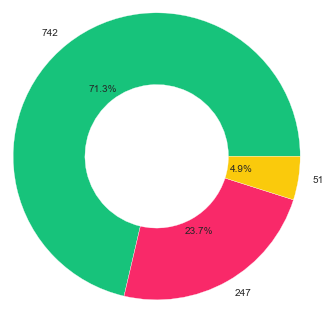

In [25]:
percent_class=df_like.value_counts()
colors = ['#17C37B','#F92969','#FACA0C']

my_pie,_,_= plt.pie(percent_class,radius = 1.2,labels=percent_class,colors=colors,autopct="%.1f%%")

plt.setp(my_pie, width=0.6, edgecolor='white') 

plt.show()

# Regular Expressions

we use Regular Expression by  string-searching algorithms for "find" or "find and replace" operations on strings, or for input validation.

In [26]:
# Convert to list
data = dataframe[dataframe.columns[0]].values.tolist()

# Remove Emails
data = [re.sub('\S*@\S*\s?', '', sent) for sent in data]

# Remove new line characters
data = [re.sub('\s+', ' ', sent) for sent in data]

# Remove distracting single quotes
data = [re.sub("\'", "", sent) for sent in data]

# Remove Numbers
data = [re.sub("\d", "", sent) for sent in data]

data = [re.sub("pdf", "", sent) for sent in data]
data = [re.sub("!", "", sent) for sent in data]
data = [re.sub("؟؟", "", sent) for sent in data]
data = [re.sub("👎👎", "", sent) for sent in data]
data = [re.sub("من", "ان", sent) for sent in data]
data = [re.sub("عن", "على", sent) for sent in data]
data = [re.sub("اذا", "لماذا", sent) for sent in data]
print(data)

[' توكلنا تطبيق رائع على مستوى العالم أثبت انه الأفضل', ' متوقف علىدي بعض التطبيقات على سبيل المثال الجواز الصحي وعدة تطبيقات ويعطيني لان ادخل عليها ان توكنا موقف', ' ان أفضل التطبيقات', '.. التحديث الاخير ..مع اني عامل سماح للموقع وشغال مع كل التطبيقات....الا ان تطبيق توكلنا لا يعمل وتظهر رساله الموقع رغم حذفي للتطبيق اكثران مره..دعمكم لاصلاح هذه المشكله ', ' نجوم قليلة بحقه مشكلته بعض الأوقات ما يشتغل بدون نت', 'ابداع تقني سعودي', 'اتانى اضافه الدفع الإلكتروني للوصول الى انصة متكاملة', 'اتانى تطويره لجعله أسهل عامة المواطنين واختيار مصطلحات ومسميات سهلة الفهم للجميع ', 'اجمل وافضل برنامج للمحافظة على صحة الإنسان بالتوفيق إن شاء الله', 'احد الانجزات الوطنية التي نفخر بها', 'احس بالأمان الحمد الله .. اللهم ادمها نعمة ولا تحرانا انها ..توكلنا على الله', 'احس حالي مع التطبيق فيه ان يهتم بي شكرن لكم بارك الله فيكم', 'احسن تطبيق فى العالم كله', 'احيانا يطلع ونرجع نسجل ان جديد', 'اخذت الجرعه الثالثه وسرعه في إنجاز التطعيم وحسن اخلاق العاملين وجزى الله حكومتنا كل خير ورايتك دوم عاليه يارب ',

In [27]:
stopwords_list = stopwords.words('arabic')
stopwords_list

['إذ',
 'إذا',
 'إذما',
 'إذن',
 'أف',
 'أقل',
 'أكثر',
 'ألا',
 'إلا',
 'التي',
 'الذي',
 'الذين',
 'اللاتي',
 'اللائي',
 'اللتان',
 'اللتيا',
 'اللتين',
 'اللذان',
 'اللذين',
 'اللواتي',
 'إلى',
 'إليك',
 'إليكم',
 'إليكما',
 'إليكن',
 'أم',
 'أما',
 'أما',
 'إما',
 'أن',
 'إن',
 'إنا',
 'أنا',
 'أنت',
 'أنتم',
 'أنتما',
 'أنتن',
 'إنما',
 'إنه',
 'أنى',
 'أنى',
 'آه',
 'آها',
 'أو',
 'أولاء',
 'أولئك',
 'أوه',
 'آي',
 'أي',
 'أيها',
 'إي',
 'أين',
 'أين',
 'أينما',
 'إيه',
 'بخ',
 'بس',
 'بعد',
 'بعض',
 'بك',
 'بكم',
 'بكم',
 'بكما',
 'بكن',
 'بل',
 'بلى',
 'بما',
 'بماذا',
 'بمن',
 'بنا',
 'به',
 'بها',
 'بهم',
 'بهما',
 'بهن',
 'بي',
 'بين',
 'بيد',
 'تلك',
 'تلكم',
 'تلكما',
 'ته',
 'تي',
 'تين',
 'تينك',
 'ثم',
 'ثمة',
 'حاشا',
 'حبذا',
 'حتى',
 'حيث',
 'حيثما',
 'حين',
 'خلا',
 'دون',
 'ذا',
 'ذات',
 'ذاك',
 'ذان',
 'ذانك',
 'ذلك',
 'ذلكم',
 'ذلكما',
 'ذلكن',
 'ذه',
 'ذو',
 'ذوا',
 'ذواتا',
 'ذواتي',
 'ذي',
 'ذين',
 'ذينك',
 'ريث',
 'سوف',
 'سوى',
 'شتان',
 'عدا',
 'عسى',
 'عل'

In [28]:
# return an array
stemmer = FarasaStemmer()

def stemm(tweetstr):
    stemstr = []
    for s in tweetstr:
        st = stemmer.stem(s)
        stemstr.append(st)
    return stemstr

In [29]:
data = stemm(data)

In [30]:
data

['توكل تطبيق رائع على مستوى عالم أثبت ان أفضل',
 'متوقف علىدي بعض تطبيق على سبيل مثال جواز صحي عدة تطبيق أعطى لان أدخل على ان توك موقف',
 'ان أفضل تطبيق',
 '. . تحديث أخير . .مع ان عامل سماح موقع شغال مع كل تطبيق . ...الا ان تطبيق توكل لا عمل ظهر رسال موقع رغم حذف تطبيق اكثر مر . .دعمكم إصلاح هذا مشكله',
 'نجم قليل حق مشكلة بعض وقت ما اشتغل دون نت',
 'ابداع تقني سعودي',
 'اتانى اضاف دفع إلكتروني وصول الى انص متكامل',
 'اتانى تطوير جعل أسهل عام مواطن اختيار مصطلح مسمى سهل فهم جميع',
 'أجمل أفضل برنامج محافظة على صحة إنسان توفيق إن شاء الله',
 'أحد انجز وطنية الذي فخر ب',
 'احس أمان حمد الله . . اللهم ادم نعمة لا تحرا ان . .توكلنا على الله',
 'احس حال مع تطبيق في ان اهتم بي شكرن ل باراك الله في',
 'أحسن تطبيق في عالم كل',
 'حين اطلع رجع سجل ان جديد',
 'أخذ جرع ثالثه سرع في إنجاز تطعيم حسن اخلاق عامل جزى الله حكومة كل خير راية دوم عالي يارب',
 'لماذا في تحديث برنامج يش ما أعطى تنبيه قبل وقت كافي . .. انت عرف ما قدر دخل اي مقر إلا توكل . .. تخيل جالس في شمس انتظر توكل حدث',
 'ارائع كل مقيا

# TF-IDF$CountVectorizer

In [31]:
#Instantiate
vectorizer=CountVectorizer()
# Fit Transform
countvec=vectorizer.fit_transform(data)

In [32]:
countvec.A

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [33]:

vectorizer.get_feature_names() # feature names are the terms /words

['آان',
 'آانا',
 'آخر',
 'آفة',
 'آمين',
 'آن',
 'أان',
 'أانيا',
 'أبد',
 'أبشر',
 'أبعد',
 'أتان',
 'أتانى',
 'أتكال',
 'أتوقع',
 'أثبت',
 'أثر',
 'أثناء',
 'أجاب',
 'أجد',
 'أجزى',
 'أجل',
 'أجمل',
 'أجنبيه',
 'أحب',
 'أحجم',
 'أحد',
 'أحدث',
 'أحذف',
 'أحرج',
 'أحسن',
 'أحضر',
 'أخذ',
 'أخرى',
 'أخص',
 'أخطأ',
 'أخير',
 'أداء',
 'أداة',
 'أدام',
 'أدخل',
 'أدى',
 'أذن',
 'أراد',
 'أرجو',
 'أرشيف',
 'أرض',
 'أروع',
 'أريد',
 'أزال',
 'أزمة',
 'أسأل',
 'أساسي',
 'أسبوع',
 'أسبوعي',
 'أستطع',
 'أستطيع',
 'أستمرار',
 'أسر',
 'أسرة',
 'أسرع',
 'أسف',
 'أسهل',
 'أسو',
 'أسوأ',
 'أسواق',
 'أشعر',
 'أشكر',
 'أشهر',
 'أشياء',
 'أصاب',
 'أصبح',
 'أصطناعي',
 'أصل',
 'أصلح',
 'أصيل',
 'أضاف',
 'أظهر',
 'أعاد',
 'أعان',
 'أعجب',
 'أعد',
 'أعرف',
 'أعز',
 'أعطاني',
 'أعطى',
 'أعظم',
 'أعلى',
 'أعماق',
 'أعمل',
 'أغلب',
 'أغلق',
 'أغنى',
 'أفاد',
 'أفرج',
 'أفسح',
 'أفضل',
 'أفضلوجزاالله',
 'أفعل',
 'أفقد',
 'أفكار',
 'أقال',
 'أقدر',
 'أقرب',
 'أقسم',
 'أقصى',
 'أقضل',
 'أقفل',
 'أقل',
 'أقيم',

In [34]:
# Instantate with hyperparameter = 20 terms
vectorizer=CountVectorizer(max_features=20)
# Fit Transform
countvec=vectorizer.fit_transform(data)

In [35]:
print(countvec.A)
print(vectorizer.get_feature_names())

[[0 1 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
['الله', 'ان', 'برنامج', 'تحديث', 'تطبيق', 'توكل', 'جد', 'جميع', 'رائع', 'سهل', 'شكر', 'على', 'في', 'كثير', 'كل', 'لا', 'ما', 'ممتاز', 'موعد', 'هذا']


In [36]:

# Instantiate with hyperparameter = 6 terms 
vectorizer=CountVectorizer(max_features=6, ngram_range=(1,2))
# Fit Transform
countvec=vectorizer.fit_transform(data)

In [37]:
print(countvec.A)
print(vectorizer.get_feature_names())

[[0 1 1 0 1 0]
 [0 1 2 0 2 0]
 [0 1 1 0 0 0]
 ...
 [0 0 0 0 1 0]
 [0 0 0 0 1 0]
 [0 0 0 0 1 0]]
['الله', 'ان', 'تطبيق', 'جد', 'على', 'في']


###### TF = (# occurrences of term t in document) / (# of words in document)

In [38]:
# No hyperparameter set for number of words
vectorizer=TfidfVectorizer(use_idf=False, norm='l1')
tfvec=vectorizer.fit_transform(data)

In [39]:
print(tfvec.A)
print(vectorizer.get_feature_names()) # gives all feature names

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
['آان', 'آانا', 'آخر', 'آفة', 'آمين', 'آن', 'أان', 'أانيا', 'أبد', 'أبشر', 'أبعد', 'أتان', 'أتانى', 'أتكال', 'أتوقع', 'أثبت', 'أثر', 'أثناء', 'أجاب', 'أجد', 'أجزى', 'أجل', 'أجمل', 'أجنبيه', 'أحب', 'أحجم', 'أحد', 'أحدث', 'أحذف', 'أحرج', 'أحسن', 'أحضر', 'أخذ', 'أخرى', 'أخص', 'أخطأ', 'أخير', 'أداء', 'أداة', 'أدام', 'أدخل', 'أدى', 'أذن', 'أراد', 'أرجو', 'أرشيف', 'أرض', 'أروع', 'أريد', 'أزال', 'أزمة', 'أسأل', 'أساسي', 'أسبوع', 'أسبوعي', 'أستطع', 'أستطيع', 'أستمرار', 'أسر', 'أسرة', 'أسرع', 'أسف', 'أسهل', 'أسو', 'أسوأ', 'أسواق', 'أشعر', 'أشكر', 'أشهر', 'أشياء', 'أصاب', 'أصبح', 'أصطناعي', 'أصل', 'أصلح', 'أصيل', 'أضاف', 'أظهر', 'أعاد', 'أعان', 'أعجب', 'أعد', 'أعرف', 'أعز', 'أعطاني', 'أعطى', 'أعظم', 'أعلى', 'أعماق', 'أعمل', 'أغلب', 'أغلق', 'أغنى', 'أفاد', 'أفرج', 'أفسح', 'أفضل', 'أفضلوجزاالله', 'أفعل', 'أفقد', 'أفكار', 'أقال', 'أقدر', 'أقرب',

###### IDF = log(# of documents / # documents with term t in them)


In [40]:
# Instantiate
vectorizer_idf=TfidfVectorizer(smooth_idf=False) # eliminates log(0)
# Fit Transform
tfidfvec=vectorizer_idf.fit_transform(data)

In [41]:
print(vectorizer_idf.idf_)
print(vectorizer_idf.get_feature_names())

[6.8483637  7.94697599 5.54908072 ... 7.94697599 5.00253701 6.8483637 ]
['آان', 'آانا', 'آخر', 'آفة', 'آمين', 'آن', 'أان', 'أانيا', 'أبد', 'أبشر', 'أبعد', 'أتان', 'أتانى', 'أتكال', 'أتوقع', 'أثبت', 'أثر', 'أثناء', 'أجاب', 'أجد', 'أجزى', 'أجل', 'أجمل', 'أجنبيه', 'أحب', 'أحجم', 'أحد', 'أحدث', 'أحذف', 'أحرج', 'أحسن', 'أحضر', 'أخذ', 'أخرى', 'أخص', 'أخطأ', 'أخير', 'أداء', 'أداة', 'أدام', 'أدخل', 'أدى', 'أذن', 'أراد', 'أرجو', 'أرشيف', 'أرض', 'أروع', 'أريد', 'أزال', 'أزمة', 'أسأل', 'أساسي', 'أسبوع', 'أسبوعي', 'أستطع', 'أستطيع', 'أستمرار', 'أسر', 'أسرة', 'أسرع', 'أسف', 'أسهل', 'أسو', 'أسوأ', 'أسواق', 'أشعر', 'أشكر', 'أشهر', 'أشياء', 'أصاب', 'أصبح', 'أصطناعي', 'أصل', 'أصلح', 'أصيل', 'أضاف', 'أظهر', 'أعاد', 'أعان', 'أعجب', 'أعد', 'أعرف', 'أعز', 'أعطاني', 'أعطى', 'أعظم', 'أعلى', 'أعماق', 'أعمل', 'أغلب', 'أغلق', 'أغنى', 'أفاد', 'أفرج', 'أفسح', 'أفضل', 'أفضلوجزاالله', 'أفعل', 'أفقد', 'أفكار', 'أقال', 'أقدر', 'أقرب', 'أقسم', 'أقصى', 'أقضل', 'أقفل', 'أقل', 'أقيم', 'أكبر', 'أكتوبر', 'أكثر', 'أكد', 'أك

In [42]:
# This is the final TF-IDF matrix
tfidfvec.A

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

# Topic Modeling -LDA

In [43]:
def tokenize(text):
    tokens = [word for word in nltk.word_tokenize(text) if (len(word) > 3 and len(word.strip('Xx/')) > 2) ] 
    stems = [stemmer.stem(item) for item in tokens]
    return tokens

In [44]:
vectorizer_tf = TfidfVectorizer(max_df=0.75, min_df=50, max_features=10000, use_idf=False, norm=None)
tf_vectors = vectorizer_tf.fit_transform(X_train.complaints)

In [45]:
tf_vectors.A

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 1., 1., 1.]])

In [46]:
vectorizer_idf.get_feature_names()

['آان',
 'آانا',
 'آخر',
 'آفة',
 'آمين',
 'آن',
 'أان',
 'أانيا',
 'أبد',
 'أبشر',
 'أبعد',
 'أتان',
 'أتانى',
 'أتكال',
 'أتوقع',
 'أثبت',
 'أثر',
 'أثناء',
 'أجاب',
 'أجد',
 'أجزى',
 'أجل',
 'أجمل',
 'أجنبيه',
 'أحب',
 'أحجم',
 'أحد',
 'أحدث',
 'أحذف',
 'أحرج',
 'أحسن',
 'أحضر',
 'أخذ',
 'أخرى',
 'أخص',
 'أخطأ',
 'أخير',
 'أداء',
 'أداة',
 'أدام',
 'أدخل',
 'أدى',
 'أذن',
 'أراد',
 'أرجو',
 'أرشيف',
 'أرض',
 'أروع',
 'أريد',
 'أزال',
 'أزمة',
 'أسأل',
 'أساسي',
 'أسبوع',
 'أسبوعي',
 'أستطع',
 'أستطيع',
 'أستمرار',
 'أسر',
 'أسرة',
 'أسرع',
 'أسف',
 'أسهل',
 'أسو',
 'أسوأ',
 'أسواق',
 'أشعر',
 'أشكر',
 'أشهر',
 'أشياء',
 'أصاب',
 'أصبح',
 'أصطناعي',
 'أصل',
 'أصلح',
 'أصيل',
 'أضاف',
 'أظهر',
 'أعاد',
 'أعان',
 'أعجب',
 'أعد',
 'أعرف',
 'أعز',
 'أعطاني',
 'أعطى',
 'أعظم',
 'أعلى',
 'أعماق',
 'أعمل',
 'أغلب',
 'أغلق',
 'أغنى',
 'أفاد',
 'أفرج',
 'أفسح',
 'أفضل',
 'أفضلوجزاالله',
 'أفعل',
 'أفقد',
 'أفكار',
 'أقال',
 'أقدر',
 'أقرب',
 'أقسم',
 'أقصى',
 'أقضل',
 'أقفل',
 'أقل',
 'أقيم',

In [47]:
X_train.complaints

654    شكرا توكلنا شكرا حكومتنا الرشيدة\n                                                                                                                                          
371    تطبيق صحتي تجربة سيئه جدا                                                                                                                                                   
147    اوجه مشكله عدم التحديث او التعليق اثناء التحديث                                                                                                                             
27     اصبح تطبيق توكلنا كوثيقة تحتوي على كل محتويات ابشر ارجو ان يتم الاكتفاء به عن الاثباتات الخرى مثل الرخصة والاستمارة والتأمين وجواز السفر والحالة الصحية والاجتماعية لكل شخص.
72     التطبيق رائع بما تعنيه الكلمة ونتطلع الى تطويره ليشمل اكثر من ذلك                                                                                                           
                                     ...                                                            

In [48]:
vectorizer_tf.get_feature_names()

['التطبيق',
 'الله',
 'برنامج',
 'تطبيق',
 'توكلنا',
 'جدا',
 'رائع',
 'شكرا',
 'على',
 'في',
 'كل',
 'ممتاز',
 'من',
 'هذا']

### Decomposition method

In [49]:
# Instantiate LDA
lda = decomposition.LatentDirichletAllocation(n_components=6, max_iter=3, learning_method='online', learning_offset=50, n_jobs=-1, random_state=111)

W1 = lda.fit_transform(tf_vectors)
H1 = lda.components_

In [50]:
W1

array([[0.0416957 , 0.04171525, 0.04169561, 0.04175706, 0.0416694 ,
        0.79146698],
       [0.05577849, 0.4359044 , 0.05556909, 0.34128274, 0.05557313,
        0.05589214],
       [0.16666667, 0.16666667, 0.16666667, 0.16666667, 0.16666667,
        0.16666667],
       ...,
       [0.08333537, 0.08342989, 0.58307734, 0.08335575, 0.08345586,
        0.08334579],
       [0.05573468, 0.05556571, 0.05563503, 0.05556227, 0.72184097,
        0.05566134],
       [0.23282559, 0.55536982, 0.02109781, 0.02103552, 0.14830704,
        0.02136423]])

In [51]:
W1.shape

(728, 6)

In [52]:
num_words=15

vocab = np.array(vectorizer_tf.get_feature_names())

top_words = lambda t: [vocab[i] for i in np.argsort(t)[:-num_words-1:-1]]
topic_words = ([top_words(t) for t in H1])
topics = [' '.join(t) for t in topic_words]

In [53]:
len(topics)

6

In [54]:
topics

['من الله تطبيق كل رائع ممتاز على في شكرا توكلنا جدا هذا التطبيق برنامج',
 'جدا ممتاز تطبيق الله رائع هذا من على التطبيق توكلنا شكرا في كل برنامج',
 'التطبيق من برنامج هذا على كل الله في رائع شكرا تطبيق توكلنا ممتاز جدا',
 'تطبيق ممتاز رائع توكلنا شكرا هذا في من على التطبيق جدا الله برنامج كل',
 'في كل على هذا الله التطبيق ممتاز جدا تطبيق من برنامج رائع شكرا توكلنا',
 'على توكلنا تطبيق شكرا كل في من الله برنامج التطبيق هذا ممتاز رائع جدا']

In [55]:

colnames = ["تحديث","سهل الاستخدام","الوطن","برنامج","تعليق","خدمات"]
docnames = ["Doc" + str(i) for i in range(len(X_train.complaints))]
df_doc_topic = pd.DataFrame(np.round(W1, 2), columns=colnames, index=docnames)
significant_topic = np.argmax(df_doc_topic.values, axis=1)
df_doc_topic['dominant_topic'] = significant_topic

In [56]:
df_doc_topic

,تحديث,سهل الاستخدام,الوطن,برنامج,تعليق,خدمات,dominant_topic
Doc0,0.04,0.04,0.04,0.04,0.04,0.79,5
Doc1,0.06,0.44,0.06,0.34,0.06,0.06,1
Doc2,0.17,0.17,0.17,0.17,0.17,0.17,0
Doc3,0.03,0.03,0.03,0.03,0.03,0.83,5
Doc4,0.38,0.04,0.45,0.04,0.04,0.04,2
...,...,...,...,...,...,...,...
Doc723,0.08,0.08,0.08,0.08,0.08,0.58,5
Doc724,0.06,0.06,0.72,0.06,0.06,0.06,2
Doc725,0.08,0.08,0.58,0.08,0.08,0.08,2
Doc726,0.06,0.06,0.06,0.06,0.72,0.06,4


In [57]:
X_train.head()

,complaints
654,شكرا توكلنا شكرا حكومتنا الرشيدة\n
371,تطبيق صحتي تجربة سيئه جدا
147,اوجه مشكله عدم التحديث او التعليق اثناء التحديث
27,اصبح تطبيق توكلنا كوثيقة تحتوي على كل محتويات ابشر ارجو ان يتم الاكتفاء به عن الاثباتات الخرى مثل الرخصة والاستمارة والتأمين وجواز السفر والحالة الصحية والاجتماعية لكل شخص.
72,التطبيق رائع بما تعنيه الكلمة ونتطلع الى تطويره ليشمل اكثر من ذلك


In [58]:
# Test on the first 5 documents in X_test
Wtest = lda.transform(vectorizer_tf.transform(X_test.complaints[:5]))

In [59]:
# doccument - topic matris for the first 5 documents in the X_test data
Wtest.shape

(5, 6)

In [60]:
colnames = ["تحديث","سهل الاستخدام","الوطن","برنامج","تعليق","خدمات"]
docnames = ["Doc" + str(i) for i in range(len(X_test.complaints[:5]))]
df_doc_topic = pd.DataFrame(np.round(Wtest, 2), columns=colnames, index=docnames)
significant_topic = np.argmax(df_doc_topic.values, axis=1)
df_doc_topic['dominant_topic'] = significant_topic

In [61]:
df_doc_topic.shape

(5, 7)

In [62]:
df_doc_topic

,تحديث,سهل الاستخدام,الوطن,برنامج,تعليق,خدمات,dominant_topic
Doc0,0.06,0.72,0.06,0.06,0.06,0.06,1
Doc1,0.42,0.02,0.02,0.02,0.12,0.38,0
Doc2,0.06,0.06,0.06,0.06,0.06,0.72,5
Doc3,0.03,0.03,0.46,0.03,0.41,0.03,2
Doc4,0.04,0.04,0.04,0.04,0.04,0.79,5


In [63]:
X_test.shape

(312, 1)

In [64]:
X_test.head()

,complaints
851,ممتاز جدا
361,تطبيق روعه حبذا لو فكروا في إضافة مجال التصاريح الخاصة بالكوارث والأوبئة لمن لديهم أكثر من بيت او زوجه أن يفسح لهم وبالمجمل تطبيق عظيم وان شالله نرى تطبيقات سعوديه قريبا ك توكلنا والشر وتباعد صحتي وغيرها من النجاحات بالتوفيق يارب\n
667,شكرا لكم على جهودكم
742,كل مرة عند الحجز يقول لي: حدث خطأ أعد المحاولة. المستشفى ما فيه أحد لكن ما يقبل إلا بالموعد، حجزت من طريق ٩٣٧ للتطعيم وهو حجز لي طبيب الأسرة، في المستشفى ما قبلوا. والله وتالله، عدم وجود التطبيق كان أحسن مائة مرة!!!
310,تطبيق توكلنا نظامي يدل على التطور الحقيقي شكر المملكة العربة السعودية


# Topic Modling -NMF

# Stemming words with NLTK

In [65]:
#stemmer = PorterStemmer()
stemmer = nltk.stem.SnowballStemmer('arabic')
nltk.download('stopwords')
stop_words = set(nltk.corpus.stopwords.words('arabic'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [66]:
# This function will tokenize the words, convert to lower case and do the stemming
def tokenize(text):
    tokens = [word for word in nltk.word_tokenize(text) if (len(word) > 3 and len(word.strip('Xx/')) > 2 and len(re.sub('\d+', '', word.strip('Xx/'))) > 3) ] 
    tokens = map(str.lower, tokens)
    stems = [stemmer.stem(item) for item in tokens if (item not in stop_words)]
    return stems

In [67]:
# Instatiate
vectorizer = TfidfVectorizer(tokenizer=tokenize, stop_words=None, max_df=0.75, max_features=1000, lowercase=False, ngram_range=(1,2))
# Fit & Transform
tfidf_vectors=vectorizer.fit_transform(X_train["complaints"].values.astype("U"))

In [68]:
tfidf_vectors.shape # THE TERM DOCUMENT MATRIX (MATRIX ON THE LEFT HAND SIDE)

(728, 1000)

In [69]:
tfidf_vectors.A

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [70]:
vectorizer.get_feature_names()

['....',
 'ابشر',
 'اتصال',
 'اتم',
 'اتمنى',
 'اثبات',
 'اثبات جهاز',
 'اثناء',
 'اجراء',
 'اجمل',
 'اجمل وافضل',
 'اح',
 'احاول',
 'احتياج',
 'احتياج شعب',
 'احدث',
 'احذف',
 'احراج',
 'احس',
 'احفظ',
 'احفظ لاد',
 'اختصار',
 'اختصار الو',
 'اختيار',
 'اخذ',
 'اخذ جرعت',
 'اخر',
 'اخرى',
 'اخير',
 'ادخل',
 'ارج',
 'ارد دخول',
 'ارشاد',
 'ارشاد يحت',
 'ارض',
 'ارض شكر',
 'ازم',
 'ازم كور',
 'اسال',
 'اسال الله',
 'اسبوع',
 'استخدام',
 'استخدم',
 'استطيع',
 'استعمال',
 'استهل',
 'اسرع',
 'اسرع افتح',
 'اسرع ممك',
 'اسف',
 'اسف برنامج',
 'اسم',
 'اسو',
 'اسواق',
 'اشكر',
 'اشكر قايم',
 'اصبح',
 'اصطناع',
 'اصلاح',
 'اصلاح مشكله',
 'اضاف',
 'اعا',
 'اعا الله',
 'اعاد',
 'اعاد نظر',
 'اعظم',
 'اعماق',
 'اعماق قلب',
 'اعمال',
 'اعمل',
 'اغلب',
 'اغلب امور',
 'اغلب اوق',
 'اغلق',
 'افتح',
 'افتح تطبيق',
 'افتح يدخل',
 'افتقد',
 'افتقد مرون',
 'افضل',
 'افضل اكثر',
 'افضل برامج',
 'افضل تطبيق',
 'افضل رنامج',
 'افظل',
 'افظل تطبيق',
 'اقتصاد',
 'اقدر',
 'اقدر افتح',
 'اقيم',
 'اقيم تطبيق',
 

In [71]:
len(vectorizer.get_feature_names())

1000

# DECOMPOSITION USING NMF

In [72]:
# INSTANTIATE. n_components is the number of TOPICS
clf = decomposition.NMF(n_components=6, random_state=111) # components is the number of topics

W1 = clf.fit_transform(tfidf_vectors)
H1 = clf.components_

#### NMF Decomposition
### tfidf_vectors =  W1 x H1

In [73]:
tfidf_vectors.shape

(728, 1000)

In [74]:
W1.shape

(728, 6)

In [75]:
W1

array([[2.80432219e-02, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.91119922e-01],
       [5.98608579e-02, 6.81659746e-03, 1.15783811e-02, 1.39635416e-02,
        1.37236761e-03, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 2.93050539e-01,
        0.00000000e+00, 0.00000000e+00],
       ...,
       [3.37832465e-02, 0.00000000e+00, 1.94555121e-03, 1.63729702e-01,
        0.00000000e+00, 3.29361540e-03],
       [7.31489623e-02, 1.45562637e-03, 4.03028651e-02, 0.00000000e+00,
        0.00000000e+00, 8.63719601e-05],
       [0.00000000e+00, 5.69767020e-02, 0.00000000e+00, 0.00000000e+00,
        5.92031741e-02, 1.43103503e-01]])

In [76]:
H1.shape

(6, 1000)

In [77]:
H1 # TOPICS - TERMS MATRIX

array([[0.00000000e+00, 6.50520045e-02, 2.91786608e-02, ...,
        0.00000000e+00, 0.00000000e+00, 6.55274099e-03],
       [0.00000000e+00, 0.00000000e+00, 7.83874766e-03, ...,
        3.95290139e-02, 8.02110252e-03, 0.00000000e+00],
       [2.80380187e-02, 0.00000000e+00, 8.60184408e-05, ...,
        1.42673282e-02, 1.44531123e-02, 0.00000000e+00],
       [3.11192018e-03, 1.85745582e-02, 3.37426660e-03, ...,
        0.00000000e+00, 0.00000000e+00, 4.31894330e-02],
       [1.90229870e-02, 0.00000000e+00, 9.80026061e-03, ...,
        1.04695924e-01, 2.44409580e-02, 5.05779512e-03],
       [2.04501636e-03, 6.16128390e-03, 6.82449609e-03, ...,
        0.00000000e+00, 8.79627517e-03, 8.09286606e-03]])

In [78]:
H1[:, 0:1]

array([[0.        ],
       [0.        ],
       [0.02803802],
       [0.00311192],
       [0.01902299],
       [0.00204502]])

In [79]:
num_words=15 # TOPIC IS DEFINED AS A COLLECTION OF 15 WORDS

vocab = np.array(vectorizer.get_feature_names())

top_words = lambda t: [vocab[i] for i in np.argsort(t)[:-num_words-1:-1]]
topic_words = ([top_words(t) for t in H1])
topics = [' '.join(t) for t in topic_words]

In [80]:
topics # The top 15 words in the 6 topics

['تطبيق توكل تطبيق توكل افضل افضل تطبيق توكل تطبيق توكل افضل موعد توكل ممتاز صحت تطبيق موعد تطبيق صحت تطبيق ممتاز كثير كور',
 'ممتاز تطبيق ممتاز خدم ممتاز الله كثير خدم ممتاز رنامج ممتاز ممتاز جدا جدا يعط امام عاف يعط عاف تطبيق توكل ممتاز',
 'رايع تطبيق رايع تطبيق اكثر اكثر رايع عمل خدم سهل جدا استخدام تطبيق اكثر رايع جدا مفيد رايع سهل سهل استخدام',
 'تحديث يطلب يطلب تحديث مشكل كثر كثر تحديث كثير اسبوع جوال تحديث كثير ماف يفتح دايم مشكل تحديث سبب',
 'الله ممتاز الله جزا جزا الله بار بار الله ماشاء ماشاء الله جزاء عامل الله عامل تبار ممتاز جزا تبار الله الله تبار',
 'شكر رنامج قايم خدم برنامج جميل مواط جهود شكر قايم كثير مواط مقيم مقيم طيء شكر جهود رنامج ممتاز']

In [81]:
colnames = ["تحديث","سهل الاستخدام","الوطن","برنامج","تعليق","خدمات"]
docnames = ["Doc" + str(i) for i in range(len(X_train.complaints))]
df_doc_topic = pd.DataFrame(np.round(W1, 3), columns=colnames, index=docnames)
significant_topic = np.argmax(df_doc_topic.values, axis=1)
df_doc_topic['dominant_topic'] = significant_topic



In [82]:
df_doc_topic

,تحديث,سهل الاستخدام,الوطن,برنامج,تعليق,خدمات,dominant_topic
Doc0,0.028,0.000,0.000,0.000,0.000,0.191,5
Doc1,0.060,0.007,0.012,0.014,0.001,0.000,0
Doc2,0.000,0.000,0.000,0.293,0.000,0.000,3
Doc3,0.087,0.000,0.000,0.019,0.000,0.002,0
Doc4,0.004,0.000,0.224,0.006,0.000,0.000,2
...,...,...,...,...,...,...,...
Doc723,0.000,0.000,0.010,0.000,0.018,0.045,5
Doc724,0.000,0.000,0.001,0.006,0.001,0.079,5
Doc725,0.034,0.000,0.002,0.164,0.000,0.003,3
Doc726,0.073,0.001,0.040,0.000,0.000,0.000,0


In [83]:
X_train.head(20)

,complaints
654,شكرا توكلنا شكرا حكومتنا الرشيدة\n
371,تطبيق صحتي تجربة سيئه جدا
147,اوجه مشكله عدم التحديث او التعليق اثناء التحديث
27,اصبح تطبيق توكلنا كوثيقة تحتوي على كل محتويات ابشر ارجو ان يتم الاكتفاء به عن الاثباتات الخرى مثل الرخصة والاستمارة والتأمين وجواز السفر والحالة الصحية والاجتماعية لكل شخص.
72,التطبيق رائع بما تعنيه الكلمة ونتطلع الى تطويره ليشمل اكثر من ذلك
1009,يطلب التحديث مراراَ وتكراراً
309,تطبيق توكلنا من التطبيقات الفوق ممتازة ساعدت على تخطي سلبيات كثيرة وافادت بالكثير من الاحتراز وتعدي مرحلة الخطر ارجوالاستمرار عليه وبالتوفيق
639,سهل ومتميز يستحق خمسه نجوم ارجو اضافه جميع الخدمات على التي تخص المواطن والمقيم عاى هذا التطبيق والتخريج والعوده والتجديد والمواعيد والتسجيل في المدارس وارسال برقيات والزواج والرخص ويكون مكان جواز السفر واستخراج الرخصوالمحلات واصدارا الوكالات وارسال يكون يعمل مثل الفاكس اسال الله لكم كل التوفيق والنجاح الدائم توكلنا برنامج نحسد عليه. ﷲ احفظ بلادنا ومليكنا ولي عهدنا هذا برنامج قيم ذانفع ولكم منا جزيل الشكر والتقدير لمن قام على هذ التطبيق الرائع .يحفظكم الله
992,وكلنا ممتاز فيه جميع المعلومات الهامه بك جعلك لاتحمل الأشياء الشخصيه معك من بطاقة أحوال و رخص قياده
510,توكلنا برنامج جبار وممتاز ،جزا الله القائمين عليه خير


In [84]:
# We now test the model on the test set
Wtest = clf.transform(vectorizer.transform(X_test.complaints[:10]))

In [85]:
colnames = ["تحديث","سهل الاستخدام","الوطن","برنامج","تعليق","خدمات"]
docnames = ["Doc" + str(i) for i in range(len(X_test[:10].complaints))]
df_doc_topic = pd.DataFrame(np.round(Wtest, 3), columns=colnames, index=docnames)
significant_topic = np.argmax(df_doc_topic.values, axis=1)
df_doc_topic['dominant_topic'] = significant_topic

In [86]:
df_doc_topic

,تحديث,سهل الاستخدام,الوطن,برنامج,تعليق,خدمات,dominant_topic
Doc0,0.000,0.519,0.000,0.000,0.000,0.000,1
Doc1,0.089,0.001,0.018,0.002,0.023,0.002,0
Doc2,0.000,0.000,0.000,0.000,0.002,0.226,5
Doc3,0.023,0.002,0.006,0.006,0.006,0.008,0
Doc4,0.108,0.000,0.000,0.000,0.022,0.020,0
Doc5,0.012,0.000,0.000,0.000,0.011,0.009,0
Doc6,0.000,0.011,0.039,0.002,0.000,0.000,2
Doc7,0.044,0.000,0.013,0.000,0.212,0.000,4
Doc8,0.025,0.000,0.000,0.022,0.003,0.020,0
Doc9,0.000,0.002,0.000,0.000,0.007,0.000,4


In [87]:
X_test.head(10)

,complaints
851,ممتاز جدا
361,تطبيق روعه حبذا لو فكروا في إضافة مجال التصاريح الخاصة بالكوارث والأوبئة لمن لديهم أكثر من بيت او زوجه أن يفسح لهم وبالمجمل تطبيق عظيم وان شالله نرى تطبيقات سعوديه قريبا ك توكلنا والشر وتباعد صحتي وغيرها من النجاحات بالتوفيق يارب\n
667,شكرا لكم على جهودكم
742,كل مرة عند الحجز يقول لي: حدث خطأ أعد المحاولة. المستشفى ما فيه أحد لكن ما يقبل إلا بالموعد، حجزت من طريق ٩٣٧ للتطعيم وهو حجز لي طبيب الأسرة، في المستشفى ما قبلوا. والله وتالله، عدم وجود التطبيق كان أحسن مائة مرة!!!
310,تطبيق توكلنا نظامي يدل على التطور الحقيقي شكر المملكة العربة السعودية
998,يدل على أن دولتنا في رقي وتطور يواكب العصر
634,سهل جدا في الاستخدام
473,تطبيق هائل ويفيد الجميع ويخفف الزحمه جزاكم الله خير
793,لو سمحتو فجأة تغيرت الحالة الصحية من محصن أكمل جرعات اللقاح إلى محصن متعافي وأخذ جرعة!!! تواصلنا مع توكلنا و رقم وزارة الصحة وحتى الآن مافي حل\n
780,لم استخدم ايا منها


# Topic Modling -SVD  

In [88]:
vectorizer = CountVectorizer()
vectors = vectorizer.fit_transform(X_train.complaints).todense()
vectors.shape

(728, 2706)

In [89]:
vocab = np.array(vectorizer.get_feature_names())
vocab.shape

(2706,)

In [90]:
%time U, s, Vt = linalg.svd(vectors, full_matrices=False)

Wall time: 674 ms


In [91]:
pd.DataFrame(U)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,...,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668,669,670,671,672,673,674,675,676,677,678,679,680,681,682,683,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,704,705,706,707,708,709,710,711,712,713,714,715,716,717,718,719,720,721,722,723,724,725,726,727
0,-0.011266,-0.009724,0.002198,-0.014666,0.003074,-0.039601,0.020854,-0.012953,0.002129,-0.019206,0.030700,-0.009140,0.002246,-0.012341,0.001408,-0.014298,0.003752,0.106827,-0.072473,0.020171,-0.033393,0.032666,-0.074298,0.024945,-0.023425,0.026673,-0.035386,0.032726,-0.000757,0.017970,-0.025615,0.015830,-0.020922,0.002743,-0.005113,0.021758,-0.015056,-0.004501,-0.053178,0.010907,-0.090932,-0.009532,-0.017773,0.029677,0.012683,-0.039812,-0.014217,0.015760,0.054464,-0.008420,0.019135,-0.005468,0.001575,-0.000388,0.000503,-0.003333,0.013418,-0.012843,0.014551,-0.026602,0.002427,-0.008587,0.026515,-0.009569,0.010975,-0.001601,0.003852,-0.002366,0.023983,0.053471,-0.025736,0.015305,-0.018080,0.015920,-0.008543,0.005347,-0.013196,0.012523,0.001201,-0.021701,0.011487,0.056215,-0.012337,-0.008739,0.027231,0.022472,-0.024563,0.042280,0.035657,-0.013165,-0.035464,0.006732,0.014903,-0.019462,-0.008841,-0.036733,0.019692,0.000217,-0.014940,-0.015334,0.029178,0.033511,0.011620,-0.026617,-0.015781,-0.011826,0.021027,0.030399,0.010337,-0.027732,-0.007451,-0.009990,0.011503,0.004376,0.003845,0.010469,-0.024661,-0.008461,-0.020918,0.010189,0.002207,0.006815,-0.017576,-0.005019,-0.032966,-0.007542,0.015730,-0.016055,0.001812,-0.000884,0.016438,-0.009676,0.003404,-0.014966,0.010331,-0.009874,0.036032,-0.001026,0.026511,-0.028437,0.011268,-0.020819,0.013611,-0.019053,0.027666,-0.002095,0.023043,-0.009179,0.026869,-0.004944,0.024311,-0.005215,0.006852,-0.009740,0.026349,-0.002493,0.000037,0.041038,-0.026263,0.010318,-0.027198,0.003723,-0.011222,-0.001379,0.019324,-0.020415,0.012660,-0.017541,-0.014475,0.021713,-0.006106,-0.003273,0.010519,-0.008477,0.022166,0.012790,-0.035868,0.006168,-0.027722,0.003133,0.011900,-0.015858,-0.016263,0.005465,0.007023,-0.033822,0.040995,0.007319,0.002358,-0.076082,0.036512,0.012039,-0.050031,0.016959,-0.018697,-0.000023,0.012085,0.004109,-0.003558,-0.014318,0.007275,0.002786,-0.004654,-0.001133,-0.000582,0.021715,-0.003424,-0.015545,0.017734,0.012429,-0.010792,-0.004764,0.008719,0.008198,0.013610,-0.001543,-0.010949,-0.004591,0.017547,0.002574,-0.037132,0.0

In [92]:
pd.DataFrame(s)

,0
0,2.830864e+01
1,1.654501e+01
2,1.631285e+01
3,1.523953e+01
4,1.447108e+01
...,...
723,2.109856e-15
724,2.109856e-15
725,2.109856e-15
726,2.109856e-15


In [93]:
pd.DataFrame(Vt)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,...,2456,2457,2458,2459,2460,2461,2462,2463,2464,2465,2466,2467,2468,2469,2470,2471,2472,2473,2474,2475,2476,2477,2478,2479,2480,2481,2482,2483,2484,2485,2486,2487,2488,2489,2490,2491,2492,2493,2494,2495,2496,2497,2498,2499,2500,2501,2502,2503,2504,2505,2506,2507,2508,2509,2510,2511,2512,2513,2514,2515,2516,2517,2518,2519,2520,2521,2522,2523,2524,2525,2526,2527,2528,2529,2530,2531,2532,2533,2534,2535,2536,2537,2538,2539,2540,2541,2542,2543,2544,2545,2546,2547,2548,2549,2550,2551,2552,2553,2554,2555,2556,2557,2558,2559,2560,2561,2562,2563,2564,2565,2566,2567,2568,2569,2570,2571,2572,2573,2574,2575,2576,2577,2578,2579,2580,2581,2582,2583,2584,2585,2586,2587,2588,2589,2590,2591,2592,2593,2594,2595,2596,2597,2598,2599,2600,2601,2602,2603,2604,2605,2606,2607,2608,2609,2610,2611,2612,2613,2614,2615,2616,2617,2618,2619,2620,2621,2622,2623,2624,2625,2626,2627,2628,2629,2630,2631,2632,2633,2634,2635,2636,2637,2638,2639,2640,2641,2642,2643,2644,2645,2646,2647,2648,2649,2650,2651,2652,2653,2654,2655,2656,2657,2658,2659,2660,2661,2662,2663,2664,2665,2666,2667,2668,2669,2670,2671,2672,2673,2674,2675,2676,2677,2678,2679,2680,2681,2682,2683,2684,2685,2686,2687,2688,2689,2690,2691,2692,2693,2694,2695,2696,2697,2698,2699,2700,2701,2702,2703,2704,2705
0,-0.001599,-0.001992,-0.003134,-0.003152,-0.000537,-0.004545,-0.012035,-0.005496,-0.000022,-0.002770,-0.004034,-0.004844,-0.001598,-0.001379,-0.000959,-0.001992,-0.000058,-0.000910,-0.001599,-0.000184,-0.000958,-0.001352,-0.002912,-0.001518,-0.000184,-0.001518,-0.001518,-0.002384,-0.003217,-0.002393,-0.001230,-0.001379,-0.001103,-0.000023,-0.000778,-0.000395,-0.002826,-0.002154,-0.001368,-0.001139,-0.003093,-0.001329,-0.000954,-0.005344,-0.002748,-0.025179,-0.000184,-0.001174,-0.001878,-0.002115,-0.016069,-0.000537,-0.001295,-0.001805,-0.000752,-0.000537,-0.002273,-0.004228,-0.002798,-0.004597,-0.003134,-0.014744,-0.001518,-0.002384,-0.000752,-0.002780,-0.004702,-0.002577,-0.000537,-0.003134,-0.002623,-0.001518,-0.002477,-0.003152,-0.000940,-0.001834,-0.002136,-0.001662,-0.002138,-0.001878,-0.000524,-0.001834,-0.001320,-0.001885,-0.002748,-0.000841,-0.000511,-0.001539,-0.007538,-0.000987,-0.001834,-0.001834,-0.005581,-0.004597,-0.017573,-0.000503,-0.007177,-0.001830,-0.001245,-0.000841,-4.240924e-04,-0.002371,-0.000015,-1.174179e-03,-0.000671,-0.002118,-0.001595,-0.008310,-0.001231,-0.000050,-0.000102,-0.001616,-0.003079,-0.001231,-0.000901,-0.001356,-0.003736,-0.001168,-0.006853,-0.001749,-0.000066,-0.005496,-0.003143,-0.002002,-0.005548,-0.000707,-0.001128,-0.001861,-0.003501,-0.003217,-0.001121,-0.001786,-0.003274,-0.002068,-0.002427,-0.001521,-0.005218,-0.000050,-0.007723,-0.002716,-0.001073,-0.005163,-0.001518,-0.000325,-0.000066,-0.004724,-0.001245,-0.000485,-0.001880,-0.001012,-0.001245,-0.005675,-0.000140,-0.001521,-0.007238,-0.004798,-0.003031,-0.009077,-0.004867,-0.002285,-0.000680,-0.001558,-0.001126,-0.001980,-0.001051,-0.003965,-0.000936,-0.005375,-0.001688,-0.000025,-0.000661,-0.002382,-0.002384,-0.001230,-0.000930,-0.000563,-0.000050,-0.000979,-0.000955,-0.002566,-0.000987,-0.000517,-0.003093,-0.003780,-0.00

# WordCloud

 WordCloud a cloud filled with lots of words in different sizes, which represent the frequency or the importance of each word. This is called Tag Cloud or WordCloud.  how to create a WordCloud of your own  and customize it as you see fit. This will be quite handy for exploring text data .

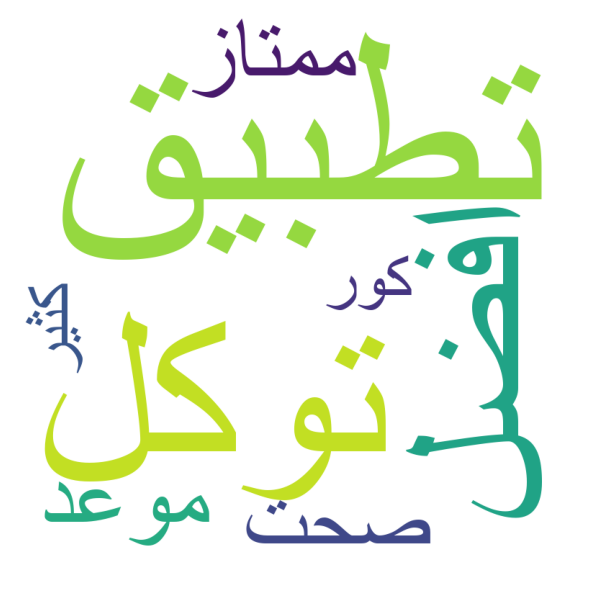

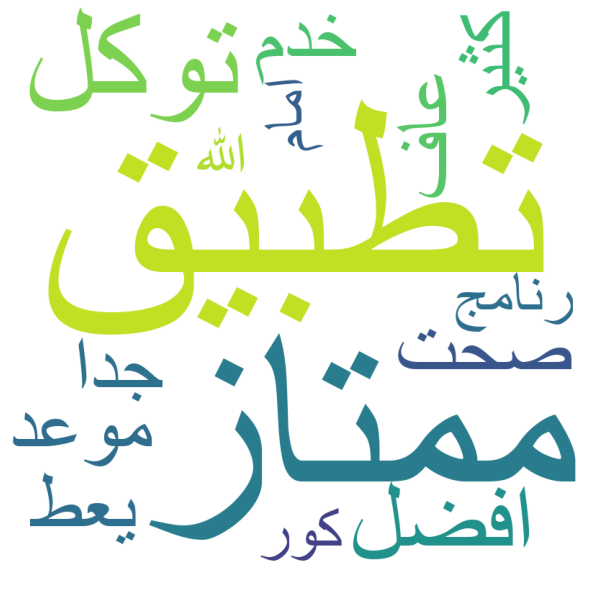

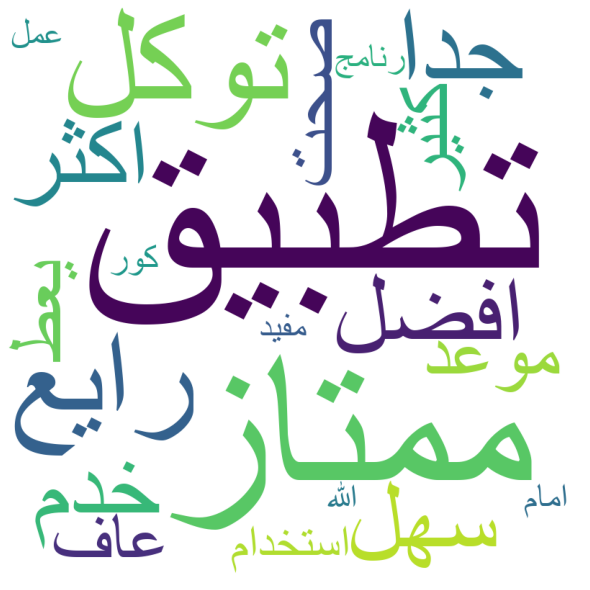

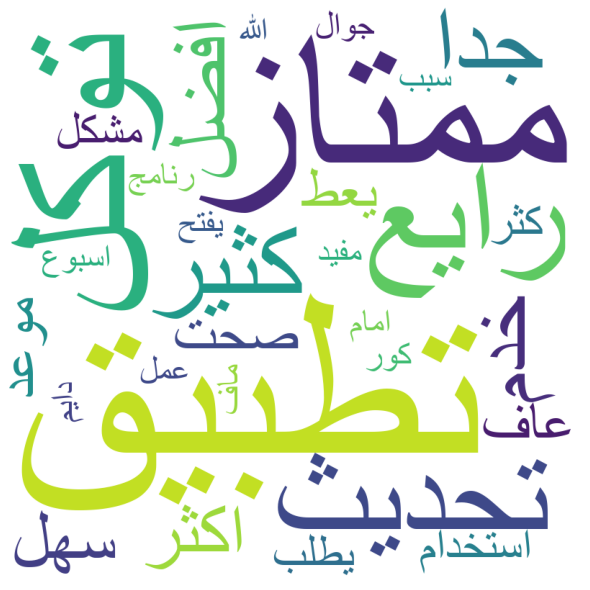

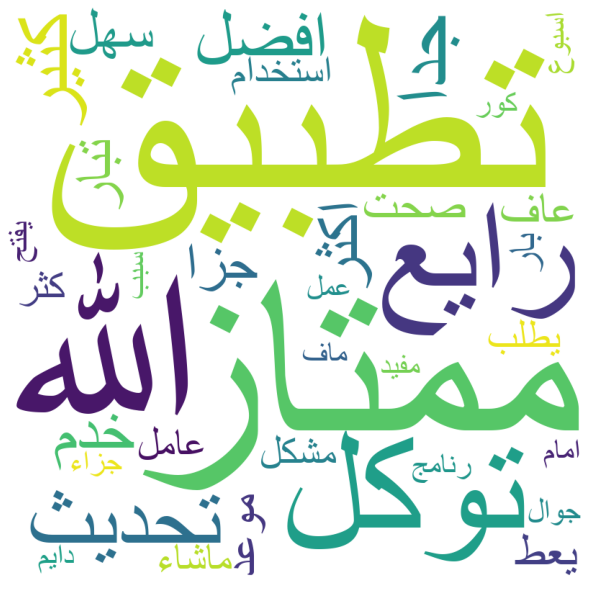

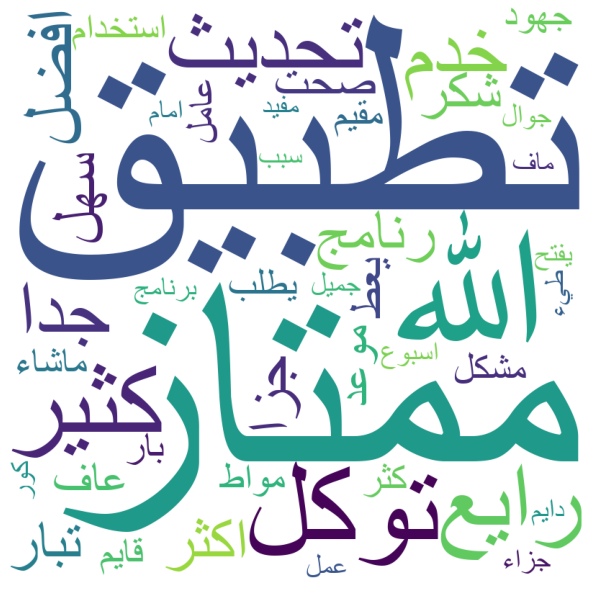

In [94]:

comment_words = '' 
stopwords = set(topics) 


for val in topics: 

    # typecaste each val to string 
    val = str(val) 

    # split the value 
    tokens = val.split() 

    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
        text_to_be_reshaped = tokens[i]
        reshaped_text = arabic_reshaper.reshape(text_to_be_reshaped)
        tokens[i] = reshaped_text[::-1] 
    comment_words += " ".join(tokens)+" "
    wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', font_path = 'arial.ttf',
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 

    # plot the WordCloud image
    plt.figure(figsize = (8, 8), facecolor = "white") 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 

    plt.show()

### A plot the number of most common opinions in tawakkalna application  using the plot method:

<AxesSubplot:>

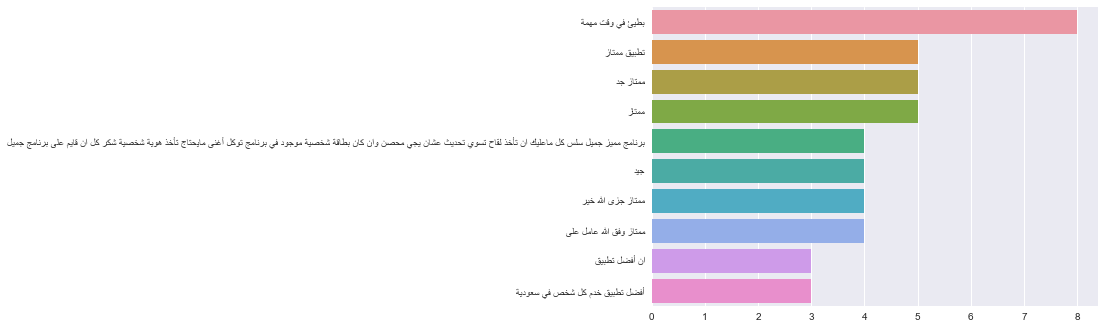

In [102]:
stop=stopwords_list
counter=Counter(data)
most=counter.most_common()
x=[]
y=[]
for word,count in most[:10]:
    if (word not in stop) :
        reshaped_text = arabic_reshaper.reshape(word)
        word= reshaped_text[::-1] 
        x.append(word)
        y.append(count)
sns.barplot(x=y,y=x)